# **This file performs below operations** -

***s1: EVI and LSWI Modeling - timeframe (2000-2022)***
```
1. Checking Noise threshold with histogram analysis
2. Remove columns with excessive noise and imputing less noisy columns with linear imputation
3. Check,visualize and handle outliers with Z-Score methodology
4. Then interpolate it with Linear Imputation
```





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import walk
from time import sleep
from tqdm import tqdm
import pickle
import string
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interpolate
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gopi_base_path = '/content/drive/MyDrive/Colab Notebooks/DISC OU/DS for Ag - Alfalfa/Fall 2023'
Adam_base_path = '/content/drive/MyDrive/DSA Project'
raj_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
base_path = gopi_base_path # just change this line
s1_data_path = os.path.join(base_path, 'Data','EVI and LSWI')
s2_data_path = os.path.join(base_path, 'Data','ER')

In [ ]:
main_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
data_path = os.path.join(main_path, 'Data')
code_path = os.path.join(main_path, 'Code')

In [ ]:
pickle_dir = os.path.join(data_path, 'pickle files')
# save the combined alfalfa data to a pickle file
pickle_dir = os.path.join(data_path, 'pickle files')
if os.path.exists(pickle_dir) == False:
  os.mkdir(pickle_dir)

In [ ]:
# Reading pickle file.
pickle_dir = os.path.join(data_path, 'pickle files')
file_name = 'p13_final_df.pkl'
file_path = os.path.join(pickle_dir, file_name)
with open(file_path, 'rb') as fp:
    p13_final_df = pickle.load(fp)

print(p13_final_df.head())

             TMAX   TMIN   TAVG   HAVG  VDEF   HDEG  CDEG    WCMN   WSPD  \
Date                                                                       
2000-02-18  64.42  33.20  41.05  76.88  1.95  16.19   0.0   23.75  16.76   
2000-02-19  50.34  27.70  36.51  75.42  2.18  25.98   0.0   22.60   5.27   
2000-02-20  62.10  23.98  45.21  64.41  5.32  21.96   0.0   20.70   8.83   
2000-02-21  69.71  46.28  58.62  61.23  6.77   7.00   0.0   41.75  16.38   
2000-02-22  68.67  52.00  59.82  91.37  1.70   4.67   0.0 -996.00  19.15   

             ATOT  RAIN   SAVG   BAVG    TR05    TR25    TR60     EVI    LSWI  
Date                                                                           
2000-02-18   6.46  0.00  47.77  47.91  1.9138  1.5788  1.5071  0.2540 -0.1110  
2000-02-19  15.68  0.00  45.89  45.79  1.9507  1.5793  1.5031  0.2436 -0.1204  
2000-02-20  15.87  0.00  45.68  45.75  2.0070  1.5821  1.5054  0.2346 -0.1281  
2000-02-21  13.73  0.00  49.57  50.79  2.0394  1.5840  1.5050  0.22

In [ ]:
p13_final_df

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60,EVI,LSWI
Date,,,,,,,,,,,,,,,,,,
2000-02-18,64.42,33.20,41.05,76.88,1.95,16.19,0.0,23.75,16.76,6.46,0.00,47.77,47.91,1.9138,1.5788,1.5071,0.2540,-0.1110
2000-02-19,50.34,27.70,36.51,75.42,2.18,25.98,0.0,22.60,5.27,15.68,0.00,45.89,45.79,1.9507,1.5793,1.5031,0.2436,-0.1204
2000-02-20,62.10,23.98,45.21,64.41,5.32,21.96,0.0,20.70,8.83,15.87,0.00,45.68,45.75,2.0070,1.5821,1.5054,0.2346,-0.1281
2000-02-21,69.71,46.28,58.62,61.23,6.77,7.00,0.0,41.75,16.38,13.73,0.00,49.57,50.79,2.0394,1.5840,1.5050,0.2270,-0.1339
2000-02-22,68.67,52.00,59.82,91.37,1.70,4.67,0.0,-996.00,19.15,4.33,0.48,52.96,54.28,2.0139,1.5848,1.5052,0.2209,-0.1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,28.77,11.00,9.35,0.01,48.02,47.67,2.3404,1.9822,2.5208,0.2145,-0.0925
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,-996.00,18.00,7.44,0.00,49.79,51.71,2.3299,1.9822,2.5161,0.2287,-0.0706
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,41.55,7.34,9.60,0.00,51.51,55.04,2.3254,1.9832,2.5116,0.2484,-0.0417


In [ ]:
p13_final_df.isnull().sum()/len(p13_final_df) #missing value check

TMAX    0.0
TMIN    0.0
TAVG    0.0
HAVG    0.0
VDEF    0.0
HDEG    0.0
CDEG    0.0
WCMN    0.0
WSPD    0.0
ATOT    0.0
RAIN    0.0
SAVG    0.0
BAVG    0.0
TR05    0.0
TR25    0.0
TR60    0.0
EVI     0.0
LSWI    0.0
dtype: float64

Data

Remove noise in sensor reading - Using histogram to identify the threshold for noise in each colun and replace with linear interpolation

Handle outliers - again to IQR or Z-score to update the oultiers with linear interpolation

We will have have complete version of the data

In [ ]:
import seaborn as sns

In [ ]:
p13_final_df_ind = p13_final_df.iloc[:,:16] #selecting only the independent variables

In [ ]:
p13_final_df_ind

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
Date,,,,,,,,,,,,,,,,
2000-02-18,64.42,33.20,41.05,76.88,1.95,16.19,0.0,23.75,16.76,6.46,0.00,47.77,47.91,1.9138,1.5788,1.5071
2000-02-19,50.34,27.70,36.51,75.42,2.18,25.98,0.0,22.60,5.27,15.68,0.00,45.89,45.79,1.9507,1.5793,1.5031
2000-02-20,62.10,23.98,45.21,64.41,5.32,21.96,0.0,20.70,8.83,15.87,0.00,45.68,45.75,2.0070,1.5821,1.5054
2000-02-21,69.71,46.28,58.62,61.23,6.77,7.00,0.0,41.75,16.38,13.73,0.00,49.57,50.79,2.0394,1.5840,1.5050
2000-02-22,68.67,52.00,59.82,91.37,1.70,4.67,0.0,-996.00,19.15,4.33,0.48,52.96,54.28,2.0139,1.5848,1.5052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,28.77,11.00,9.35,0.01,48.02,47.67,2.3404,1.9822,2.5208
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,-996.00,18.00,7.44,0.00,49.79,51.71,2.3299,1.9822,2.5161
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,41.55,7.34,9.60,0.00,51.51,55.04,2.3254,1.9832,2.5116


## Histogram for detecting noisy readings

In [ ]:
p13_final_df_ind.columns

Index(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WCMN', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60'],
      dtype='object')

In [ ]:
p13_final_df_ind_c = p13_final_df_ind.copy()

In [ ]:
p13_final_df_ind_c.reset_index(drop=True, inplace=True)

In [ ]:

p13_final_df_ind_c.isnull().sum()/len(p13_final_df_ind_c)

TMAX    0.0
TMIN    0.0
TAVG    0.0
HAVG    0.0
VDEF    0.0
HDEG    0.0
CDEG    0.0
WCMN    0.0
WSPD    0.0
ATOT    0.0
RAIN    0.0
SAVG    0.0
BAVG    0.0
TR05    0.0
TR25    0.0
TR60    0.0
dtype: float64

In [ ]:
p13_final_df_ind_c.columns

Index(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WCMN', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60'],
      dtype='object')

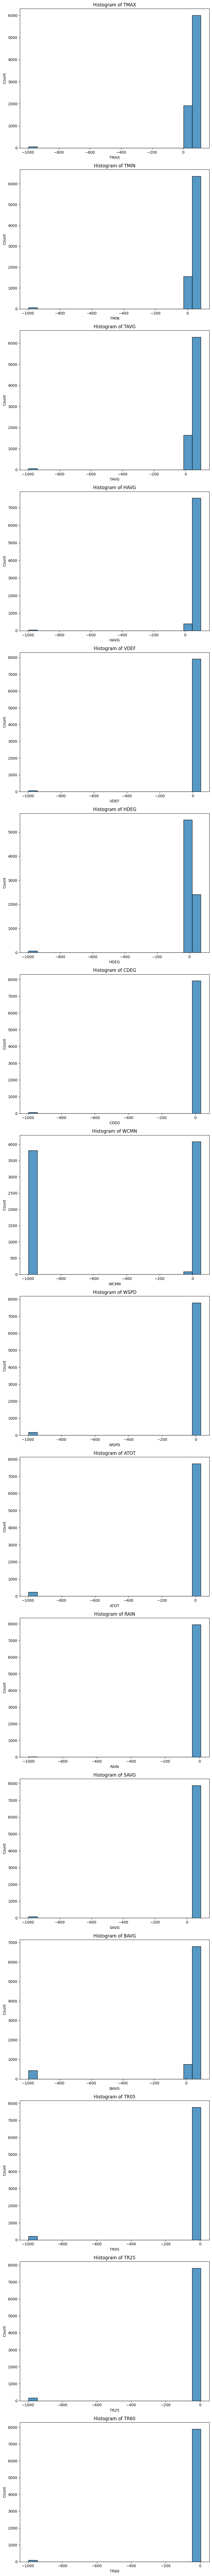

In [ ]:

columns = p13_final_df_ind.columns

# Set up subplots to display histograms for each column
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6*len(columns)))

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=p13_final_df_ind, x=column, ax=ax, bins=20)  # You can adjust the number of bins as needed
    ax.set_title(f'Histogram of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
# From the histogram, it looks like that only WCMN column has almost 50% values, containing less than -50, i.e false readings.
# So, we are not considering the column for our further analysis.
p13_final_df_ind = p13_final_df_ind.drop('WCMN',axis=1)

In [ ]:
# Iterate through each column in the DataFrame
for column in p13_final_df_ind.columns:
  # Now, values less than -50 in all numeric columns have been replaced with linear interpolated values
  p13_final_df_ind[column] = p13_final_df_ind[column].apply(lambda x: x if x >= -50 else None)
  p13_final_df_ind[column] = p13_final_df_ind[column].interpolate(method='linear')

In [ ]:
p13_final_df_ind

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
Date,,,,,,,,,,,,,,,
2000-02-18,64.42,33.20,41.05,76.88,1.95,16.19,0.0,16.76,6.46,0.00,47.77,47.91,1.9138,1.5788,1.5071
2000-02-19,50.34,27.70,36.51,75.42,2.18,25.98,0.0,5.27,15.68,0.00,45.89,45.79,1.9507,1.5793,1.5031
2000-02-20,62.10,23.98,45.21,64.41,5.32,21.96,0.0,8.83,15.87,0.00,45.68,45.75,2.0070,1.5821,1.5054
2000-02-21,69.71,46.28,58.62,61.23,6.77,7.00,0.0,16.38,13.73,0.00,49.57,50.79,2.0394,1.5840,1.5050
2000-02-22,68.67,52.00,59.82,91.37,1.70,4.67,0.0,19.15,4.33,0.48,52.96,54.28,2.0139,1.5848,1.5052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,48.02,47.67,2.3404,1.9822,2.5208
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,49.79,51.71,2.3299,1.9822,2.5161
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,51.51,55.04,2.3254,1.9832,2.5116


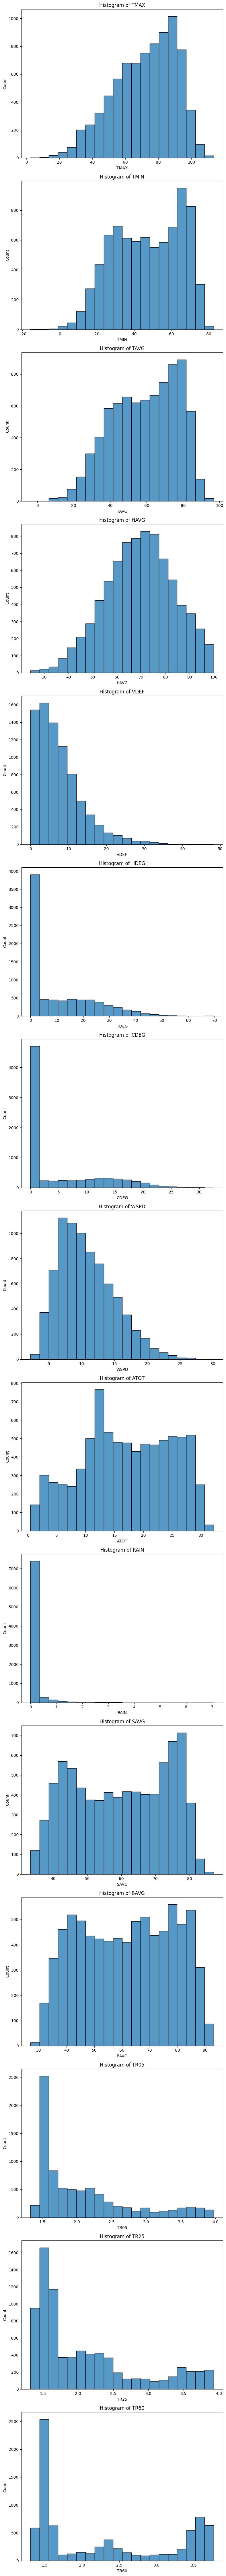

In [ ]:
# Drawing the histogram again after imputing the false readings/noise data with Linear imputation
import seaborn as sns
columns = p13_final_df_ind.columns

# Set up subplots to display histograms for each column
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6*len(columns)))

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=p13_final_df_ind, x=column, ax=ax, bins=20)  # You can adjust the number of bins as needed
    ax.set_title(f'Histogram of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Function to detect and print outlier indices for each column using Z-scores
def detect_outliers_zscore(df, threshold):
    outlier_indices = {}
    for column in df.columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        column_outlier_indices = df.index[z_scores > threshold]  # Get datetime index where Z-scores exceed threshold
        outlier_indices[column] = list(column_outlier_indices)
        if column_outlier_indices.size > 0:
            print(f"Outlier Indices for Column '{column}':")
            print(column_outlier_indices)
    return outlier_indices

outlier_indices = detect_outliers_zscore(p13_final_df_ind, threshold)

Outlier Indices for Column 'TMAX':
DatetimeIndex(['2003-02-24', '2008-12-15', '2011-02-02', '2014-02-06',
               '2021-02-14', '2021-02-15', '2021-02-16'],
              dtype='datetime64[ns]', name='Date', freq=None)
Outlier Indices for Column 'TMIN':
DatetimeIndex(['2011-02-10', '2021-02-15', '2021-02-16'], dtype='datetime64[ns]', name='Date', freq=None)
Outlier Indices for Column 'TAVG':
DatetimeIndex(['2021-02-14', '2021-02-15', '2021-02-16'], dtype='datetime64[ns]', name='Date', freq=None)
Outlier Indices for Column 'HAVG':
DatetimeIndex(['2000-09-18', '2006-01-07', '2006-01-08', '2006-01-15',
               '2006-01-18', '2006-01-19', '2006-03-11', '2011-04-05',
               '2012-08-02', '2012-08-03', '2014-05-04'],
              dtype='datetime64[ns]', name='Date', freq=None)
Outlier Indices for Column 'VDEF':
DatetimeIndex(['2000-08-20', '2000-08-26', '2000-08-27', '2000-08-28',
               '2000-08-29', '2000-08-31', '2000-09-01', '2000-09-02',
               '20

In [ ]:
# Function to visualize outliers for all columns using the Z-score method
def visualize_outliers_zscore(df, threshold):
    columns = df.columns
    num_columns = len(columns)

    # Define the figure size based on the number of columns
    fig, axes = plt.subplots(num_columns, 1, figsize=(12, 4*num_columns))

    for i, column in enumerate(columns):
        ax = axes[i]

        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Plot data points and mark outliers
        ax.scatter(df.index, df[column], c='b', marker='o', label='Non-Outlier', alpha=0.3)
        ax.scatter(df.index[z_scores > threshold], df[column][z_scores > threshold], c='r', marker='o', label='Outlier', alpha=0.7)

        ax.set_xlabel("Index")
        ax.set_ylabel(column)
        ax.set_title(f"Outliers in {column}")

        # Create a legend for the scatter plot
        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Visualize outliers for all columns using the Z-score method
visualize_outliers_zscore(p13_final_df_ind, threshold)

Output hidden; open in https://colab.research.google.com to view.

## Comparison of both Z score and IQR methodologies for detecting outliers

In [ ]:
# Define thresholds for identifying outliers (e.g., Z-score > 3 or < -3, or IQR method)
z_score_threshold = 3
iqr_threshold = 1.5

# Function to visualize outliers for all columns using the Z-score method
def visualize_outliers_zscore(df, threshold):
    columns = df.columns
    num_columns = len(columns)

    # Create subplots for Z-score visualization
    fig, axes = plt.subplots(num_columns, 2, figsize=(12, 4*num_columns))

    for i, column in enumerate(columns):
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Plot Z-score data points and mark outliers
        ax = axes[i, 0]
        ax.scatter(df.index, df[column], c='b', marker='o', label='Non-Outlier', alpha=0.3)
        ax.scatter(df.index[z_scores > threshold], df[column][z_scores > threshold], c='r', marker='o', label='Outlier', alpha=0.7)
        ax.set_xlabel("Index")
        ax.set_ylabel(column)
        ax.set_title(f"Z-Score Outliers in {column}")
        ax.legend(loc='best')

    # Function to visualize outliers for all columns using the IQR method
    def visualize_outliers_iqr(df, threshold):
        for i, column in enumerate(columns):
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)

            # Calculate IQR (Interquartile Range)
            iqr = q3 - q1

            # Define lower and upper bounds for IQR-based outlier detection
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            # Identify outlier indices using IQR
            iqr_outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

            # Plot IQR-based outliers
            ax = axes[i, 1]
            ax.scatter(df.index, df[column], c='b', marker='o', label='Non-Outlier', alpha=0.3)
            ax.scatter(iqr_outlier_indices, df[column].loc[iqr_outlier_indices], c='r', marker='o', label='Outlier', alpha=0.7)
            ax.set_xlabel("Index")
            ax.set_ylabel(column)
            ax.set_title(f"IQR Outliers in {column}")
            ax.legend(loc='best')

    # Call the IQR visualization function
    visualize_outliers_iqr(p13_final_df_ind, iqr_threshold)

    plt.tight_layout()
    plt.show()

# Visualize outliers for all columns using both Z-score and IQR methods
visualize_outliers_zscore(p13_final_df_ind, z_score_threshold)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Function to impute outliers with linear interpolation using the Z-score method
def impute_outliers_zscore(df, threshold):
    for column in df.columns:
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outlier indices based on the Z-score threshold
        outlier_indices = z_scores > threshold

        # Replace outlier values with NaN
        df[column][outlier_indices] = np.nan

        # Use linear interpolation to fill in missing values (NaN)
        df[column].interpolate(method='linear', inplace=True)

    return df


# Impute outliers with linear interpolation using the Z-score method
p13_final_df_ind_imputed_z_score = impute_outliers_zscore(p13_final_df_ind, threshold)

In [ ]:
p13_final_df_ind_imputed_z_score

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
Date,,,,,,,,,,,,,,,
2000-02-18,64.42,33.20,41.05,76.88,1.95,16.19,0.0,16.76,6.46,0.00,47.77,47.91,1.9138,1.5788,1.5071
2000-02-19,50.34,27.70,36.51,75.42,2.18,25.98,0.0,5.27,15.68,0.00,45.89,45.79,1.9507,1.5793,1.5031
2000-02-20,62.10,23.98,45.21,64.41,5.32,21.96,0.0,8.83,15.87,0.00,45.68,45.75,2.0070,1.5821,1.5054
2000-02-21,69.71,46.28,58.62,61.23,6.77,7.00,0.0,16.38,13.73,0.00,49.57,50.79,2.0394,1.5840,1.5050
2000-02-22,68.67,52.00,59.82,91.37,1.70,4.67,0.0,19.15,4.33,0.48,52.96,54.28,2.0139,1.5848,1.5052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,48.02,47.67,2.3404,1.9822,2.5208
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,49.79,51.71,2.3299,1.9822,2.5161
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,51.51,55.04,2.3254,1.9832,2.5116


In [ ]:
p13_final_df_ind_imputed_z_score['EVI'] = p13_final_df['EVI']
p13_final_df_ind_imputed_z_score['LSWI'] = p13_final_df['LSWI']

In [ ]:
p13_final_df_ind_imputed_z_score

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60,EVI,LSWI
Date,,,,,,,,,,,,,,,,,
2000-02-18,64.42,33.20,41.05,76.88,1.95,16.19,0.0,16.76,6.46,0.00,47.77,47.91,1.9138,1.5788,1.5071,0.2540,-0.1110
2000-02-19,50.34,27.70,36.51,75.42,2.18,25.98,0.0,5.27,15.68,0.00,45.89,45.79,1.9507,1.5793,1.5031,0.2436,-0.1204
2000-02-20,62.10,23.98,45.21,64.41,5.32,21.96,0.0,8.83,15.87,0.00,45.68,45.75,2.0070,1.5821,1.5054,0.2346,-0.1281
2000-02-21,69.71,46.28,58.62,61.23,6.77,7.00,0.0,16.38,13.73,0.00,49.57,50.79,2.0394,1.5840,1.5050,0.2270,-0.1339
2000-02-22,68.67,52.00,59.82,91.37,1.70,4.67,0.0,19.15,4.33,0.48,52.96,54.28,2.0139,1.5848,1.5052,0.2209,-0.1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,48.02,47.67,2.3404,1.9822,2.5208,0.2145,-0.0925
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,49.79,51.71,2.3299,1.9822,2.5161,0.2287,-0.0706
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,51.51,55.04,2.3254,1.9832,2.5116,0.2484,-0.0417


In [ ]:
# Compare the interpolation before and after interpolating the outliers

fig = px.line(p13_final_df, x=p13_final_df.index, y='VDEF')
fig.update_layout(
    title={
        'text': "Dataset before interpolating the outliers",
        'x':0.5
    })

fig.show()


fig = px.line(p13_final_df_ind_imputed_z_score, x=p13_final_df_ind_imputed_z_score.index, y='VDEF')
fig.update_layout(
    title={
        'text': " Dataset After interpolating the outliers",
        'x':0.5
    })

fig.show()

In [ ]:
#p13_final_df_ind_imputed_z_score.to_csv('p13_final_df_interpolated_z_score.csv')

In [ ]:
p13_final_df_ind_imputed = p13_final_df_ind_imputed_z_score.copy()

In [ ]:
p13_final_df_ind_imputed['RAIN_7_Days']=p13_final_df_ind_imputed['RAIN'].rolling(7).sum()
p13_final_df_ind_imputed['RAIN_14_Days']=p13_final_df_ind_imputed['RAIN'].rolling(14).sum()
p13_final_df_ind_imputed['RAIN_21_Days']=p13_final_df_ind_imputed['RAIN'].rolling(21).sum()
p13_final_df_ind_imputed['RAIN_28_Days']=p13_final_df_ind_imputed['RAIN'].rolling(28).sum()

In [ ]:
p13_final_df_ind_imputed.isnull().sum()/len(p13_final_df_ind_imputed)

TMAX            0.000000
TMIN            0.000000
TAVG            0.000000
HAVG            0.000000
VDEF            0.000000
HDEG            0.000000
CDEG            0.000000
WSPD            0.000000
ATOT            0.000000
RAIN            0.000000
SAVG            0.000000
BAVG            0.000000
TR05            0.000000
TR25            0.000000
TR60            0.000000
EVI             0.000000
LSWI            0.000000
RAIN_7_Days     0.000752
RAIN_14_Days    0.001628
RAIN_21_Days    0.002505
RAIN_28_Days    0.003382
dtype: float64

In [ ]:
p13_final_df_ind_imputed = p13_final_df_ind_imputed.dropna()

In [ ]:
p13_final_df_ind_imputed

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,...,BAVG,TR05,TR25,TR60,EVI,LSWI,RAIN_7_Days,RAIN_14_Days,RAIN_21_Days,RAIN_28_Days
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-16,51.91,30.63,35.60,99.84,0.01,23.73,0.0,12.53,1.95,0.23,...,49.05,1.5728,1.5437,1.4708,0.1671,-0.2239,0.54,1.31,2.60,3.08
2000-03-17,44.02,31.91,38.90,99.32,0.06,27.03,0.0,4.99,3.44,0.40,...,43.58,1.5291,1.5439,1.4723,0.1700,-0.2250,0.93,1.64,2.42,3.48
2000-03-18,47.59,39.43,42.18,91.32,0.85,21.49,0.0,8.90,5.66,0.02,...,46.06,1.5287,1.5465,1.4685,0.1741,-0.2236,0.95,1.66,2.44,3.50
2000-03-19,60.55,37.21,46.12,67.95,4.29,16.12,0.0,11.10,23.28,0.00,...,48.53,1.5285,1.5431,1.4681,0.1782,-0.2200,0.95,1.66,2.44,3.50
2000-03-20,73.85,37.63,55.00,57.60,8.43,9.26,0.0,15.37,23.64,0.00,...,50.28,1.5416,1.5443,1.4706,0.1825,-0.2141,0.95,1.66,2.44,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,...,47.67,2.3404,1.9822,2.5208,0.2145,-0.0925,0.01,0.02,0.02,0.02
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,...,51.71,2.3299,1.9822,2.5161,0.2287,-0.0706,0.01,0.01,0.02,0.02
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,...,55.04,2.3254,1.9832,2.5116,0.2484,-0.0417,0.01,0.01,0.02,0.02


In [ ]:
p13_final_df_ind_imputed.to_pickle('p13_final_df_ind_imputed.pkl')

In [ ]:
file_name = 'p13_final_df_ind_imputed.pkl'
file_path = os.path.join(pickle_dir, file_name)
# save/dump to pickle
with open(file_path, 'wb') as handle:
    pickle.dump(p13_final_df_ind_imputed, handle, protocol=pickle.HIGHEST_PROTOCOL)